In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
##from keras.optimizers import SGD
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling2D,BatchNormalization,Input,Reshape
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.layers import Conv1D, SeparableConv1D, MaxPool1D, LeakyReLU, Activation
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
import os
from keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16,preprocess_input
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ClassGastric-main/TMe CLassification.csv')
dt=pd.DataFrame(data)
sns.heatmap(dt.corr(),cmap='YlGnBu')
print(dt.head(10))
dt.info()

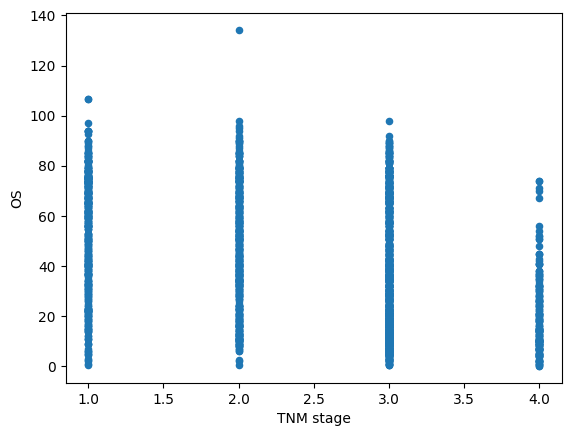

In [4]:
dt.plot.scatter(x='TNM stage',y='OS')
data=tf.convert_to_tensor(data)

In [5]:
X=pd.DataFrame(dt)
X=X.drop(['DLS'],axis=1)
y=dt['DLS']
X.shape
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)



In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_p=clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_p)
print("Accuracy using GaussianNB Classifiers: %f"%acc1)
from sklearn.metrics import precision_score,recall_score
precision = precision_score(y_test, y_p)
recall = recall_score(y_test, y_p)
print(precision,recall)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, y_p)
print("Accuracy using KNeighbors Classifiers: %f"%acc2)
precision = precision_score(y_test, y_p)
recall = recall_score(y_test, y_p)
print(precision,recall)





from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(n_estimators=59, learning_rate=0.8,max_depth=1, random_state=1).fit(X_train, y_train)
y_p=clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_test, y_p)
print("Accuracy using GaussianNB Classifiers: %f"%acc3)
precision = precision_score(y_test, y_p)
recall = recall_score(y_test, y_p)
print(precision,recall)





Accuracy using GaussianNB Classifiers: 0.720930
0.5142857142857142 0.29508196721311475
Accuracy using KNeighbors Classifiers: 0.732558
0.5454545454545454 0.3442622950819672
Accuracy using GaussianNB Classifiers: 0.720930
0.5142857142857142 0.29508196721311475


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=20)

model.summary()
model.evaluate(X_test, y_test)

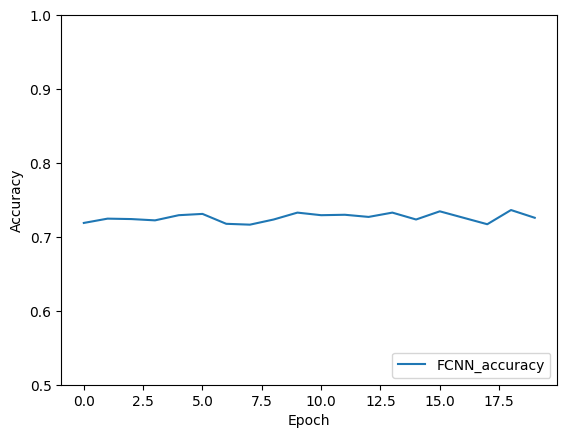

In [31]:
plt.plot(history.history['accuracy'], label='FCNN_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
